In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

from collections import Counter
from statsmodels.distributions.empirical_distribution import ECDF

### Дискретное Распределение
Сгенерируем выборку объёма 100 из дискретного распределения с шестью равновероятными исходами.

In [2]:
sample = np.random.choice([1,2,3,4,5,6], 100)

Представим теперь, что эта выборка была получена не искусственно, а путём подбрасывания симметричного шестигранного кубика 100 раз. Оценим вероятности выпадения каждой из сторон с помощью частот:

In [3]:
counted_val = np.unique(sample, return_counts=True)
counted_val = dict(zip(counted_val[0], counted_val[1]))
print(counted_val)

# Теперь поделим на общее число подбрасываний и получим вероятности:
prob_val = {k: v/100 for k,v in counted_val.items()}
print(prob_val)

{1: 14, 2: 17, 3: 21, 4: 17, 5: 18, 6: 13}
{1: 0.14, 2: 0.17, 3: 0.21, 4: 0.17, 5: 0.18, 6: 0.13}


Это и есть оценка функции вероятности дискретного распределения.

### Непрерывное распределение
Сгенерируем выборку объёма 100 из стандартного нормального распределения (с $\mu=0$ и $\sigma^2=1$)

In [4]:
norm_dist = sts.norm(0, 1)
sample = norm_dist.rvs(100)

Эмпирическая функция распределения для полученной выборки

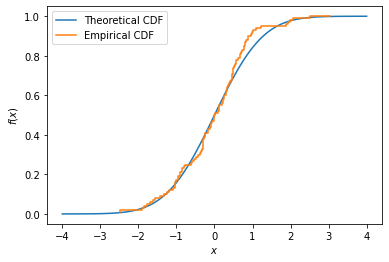

In [5]:
x_val = np.linspace(-4, 4, 100)
cdf_func = norm_dist.cdf(x_val)

plt.plot(x_val, cdf_func, label='Theoretical CDF')

ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='Empirical CDF')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left');

**Гистограмма такой выборки (bins по умолчанию)**

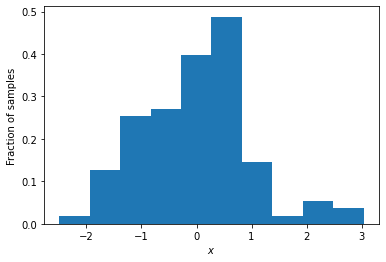

In [6]:
plt.hist(sample, density=True)
plt.ylabel('Fraction of samples')
plt.xlabel('$x$');

**Гистограмма такой выборки (bins=3)**

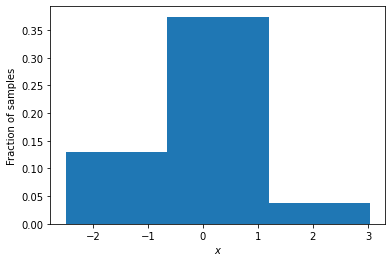

In [7]:
plt.hist(sample, bins=3, density=True)
plt.ylabel('Fraction of samples')
plt.xlabel('$x$');

Видно, что число карманов очень мало и гистогрмма не является наглядной.

**Гистограмма такой выборки (bins=40)**

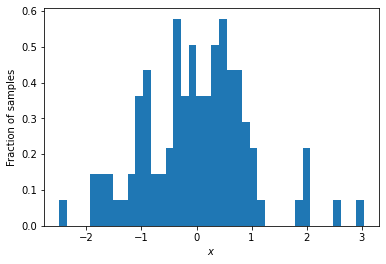

In [8]:
plt.hist(sample, bins=40, density=True)
plt.ylabel('Fraction of samples')
plt.xlabel('$x$');

Слишком много интервалов, гистогрмма разреженна.

Применим ядерное сглаживание для оценки функции плотности

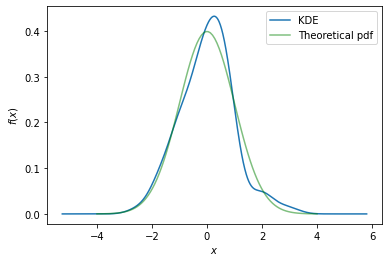

In [9]:
# для построения используем библиотеку Pandas:
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')

# На том же графике построим теоретическую плотность распределения:
x = np.linspace(-4, 4, 100)
pdf_func = norm_dist.pdf(x)
plt.plot(x, pdf_func, label='Theoretical pdf', alpha=0.5, c='g')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$');